In [11]:
from qiskit import QuantumCircuit, Aer, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

In [12]:
secret_number = bin(10)[2:]
reversed_secret_number = reversed(secret_number)
secret_number_length = len(secret_number)
secret_number_range = range(secret_number_length)

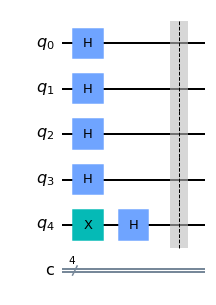

In [13]:
circuit = QuantumCircuit(secret_number_length + 1, secret_number_length)
circuit.h(secret_number_range)
circuit.x(secret_number_length)
circuit.h(secret_number_length)
circuit.barrier()
circuit.draw('mpl')

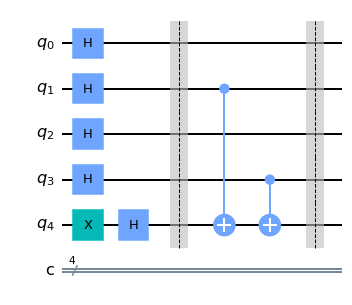

In [14]:
for pos, char in enumerate(reversed_secret_number):
    if char == '1':
        circuit.cx(pos, secret_number_length)
circuit.barrier()
circuit.draw('mpl')

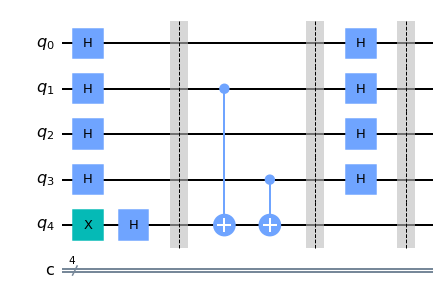

In [15]:
circuit.h(secret_number_range)
circuit.barrier()
circuit.draw('mpl')

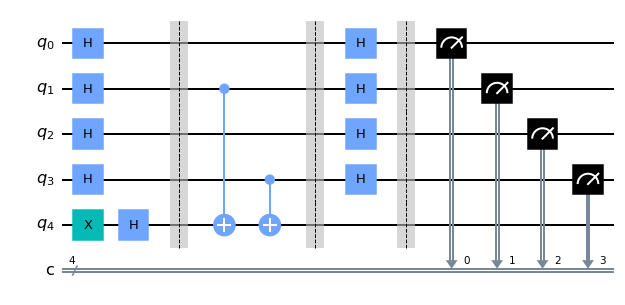

In [16]:
circuit.measure(secret_number_range, secret_number_range)
circuit.draw('mpl')

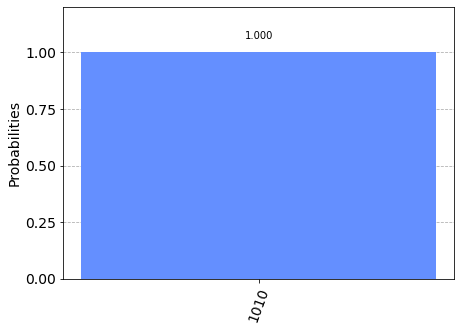

In [17]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [18]:
print(int(list(counts.keys())[0], 2))

10


In [19]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
devices = provider.backends(n_qubits=5, operational=True, simulator=False)
device = least_busy(devices)

ibmqfactory.load_account:WARNING:2022-07-28 00:48:08,820: Credentials are already in use. The existing account in the session will be replaced.


In [20]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

62e1c0eb51a4a07ca5559e6e
Job Status: job has successfully run


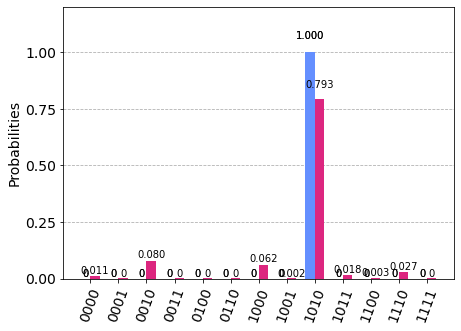

In [21]:
device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram([counts, device_counts])